<h1><center>Airline Customer Sentiment Analysis using Generative AI</center></font></h1>

<b><h2><center></center></h2></b>
<right>
<a href="https://github.com/sureshdpawar/airline-customer-sentiment-analysis-genai/blob/main/AI_Application_Case_Study_Airline_Customer_Sentiment_Analysis.ipynb" >  github link for Jupyter Notebook
</a>

# **Problem**

**SkyWings Airlines, a leading airline company, is encountering challenges in effectively managing customer feedback and sentiment expressed on social media platforms. The company seeks to develop an AI-driven sentiment analysis solution to automatically assess and categorize the feedback, thereby gaining actionable insights to enhance passenger experiences, improve customer satisfaction, and inform strategic decision-making.**

# **AI Solution Workflow**

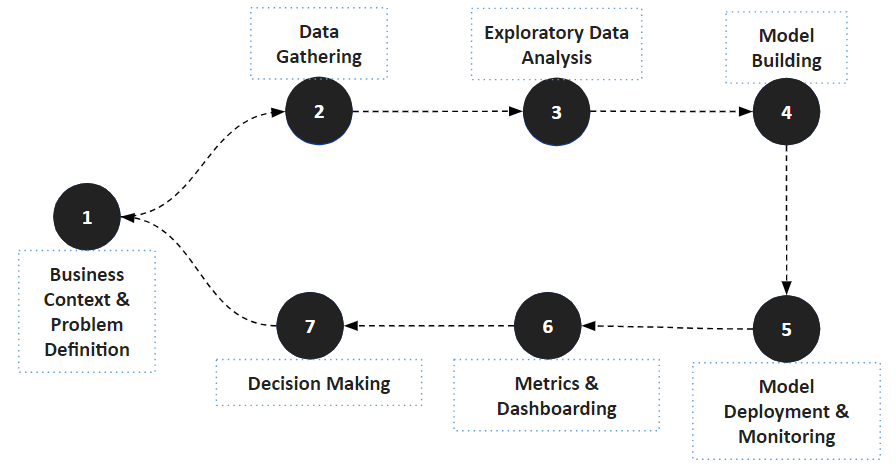

# **Business Context and Problem Definition**

## **Business Context**

In today's digital age, social media platforms like Twitter have become a prominent channel for customers to share their experiences and opinions, and the airline industry is no exception. Passengers frequently turn to Twitter to express their thoughts, feelings, and experiences related to their air travel. The ease of access and immediacy of social media has empowered customers to voice their opinions in real-time, making it a valuable source of feedback for airlines. The airline company recognized the immense value of these insights to understand customer sentiment and continuously enhance the travel experience.

However, the airline company faces a significant challenge with the rise of negative feedback on social media. Negative sentiments expressed by customers become a crucial problem to solve as they can lead to several detrimental effects, including:

1. Customer Churn: Unaddressed negative sentiment can lead to customer dissatisfaction and ultimately result in passengers choosing competitors for their future travel needs. This translates to a loss of loyal customers, impacting long-term revenue and market share.

2. Reputation Damage: Persistent negative sentiment, if left unmanaged, can tarnish an airline's reputation, and influence potential passengers to avoid booking with the airline. A damaged reputation can have lasting consequences, affecting brand loyalty and trust.

3. Financial Loss: Loss of revenue can occur if negative sentiment drives passengers away, impacting the airline's profitability and long-term success. Negative feedback can discourage potential passengers from making bookings with the airline, leading to direct financial repercussions

## **Problem Definition**

The Airline Group has been facing a pressing challenge in the past year—a sharp decline in flight bookings, resulting in a significant drop in customer numbers. In the last three months, this decrease reached an all-time high of 18%, leading to an unprecedented annual revenue loss of approximately $0.25 million. These losses have taken a toll on the airline's profit margins.

The airline has noticed a trend as they grew - the amount of feedback coming through conventional channels (airline feedback forms, surveys, etc.) has reduced and customers have started sharing their feedback by tagging the airline's official social media handles. The volume of feedback beng received on social media has significantly increased (~25%) over the past six months. In particular, the official Twitter handle of the airline saw a 50% increase in mentions. While they were initially tracking the social media feedback manually, the recent increase in volume has made it difficult to continue the same. This has prompted the airline to seek an AI-based solution to analyze the feedback provided by customers on social media. They believe that such a solution will be more effective than their current methods and provide insights that can proactively help them minimize revenue loss. As a first step, they want to start by assessing the feedback provided by customers on social media and categorizing the sentiment of the customer as negative, positive, or neutral.

# **Data Gathering**


**The data needed for buidling any AI solution is usually obtained from multiple sources.**

In the current scenario, we have the following sources:

- **Online surveys**: This is a quick and easy way to collect feedback from a large number of customers. Surveys can be sent via email, posted on the airline's website, or embedded in the airline's mobile app.

- **Social media monitoring**: Airlines can monitor social media platforms such as Twitter, Facebook, and Instagram to see what customers are saying about their airline. This can be a good way to identify customer concerns and areas for improvement.

- **Customer service interactions**: Airlines can collect feedback from customers during customer service interactions, such as phone calls, emails, and in-person interactions. Customer service representatives can ask customers directly for feedback, or they can simply listen to what customers have to say and identify common themes.

- **Review and Rating Platforms**: Monitor and analyze reviews on platforms like TripAdvisor, Yelp, or dedicated airline review sites.

The data from different sources are collected and stored in an organized and secure manner in databases. Once the data is stored, we can extract necessary data in multiple ways.

- **Data from Databases**
    - **Export as CSV/Excel File:** This method allows for exporting a selected subset or the entire dataset in a CSV (Comma-Separated Values) or Excel file format, which can be easily opened and analyzed using spreadsheet software or using programming languages like Python.
    - **Querying from the database:** This involves running SQL (Structured Query Language) queries on the database to retrieve specific data based on predefined conditions, allowing for more targeted and customized data extraction for analysis or reporting purposes. The SQL queries can be executed using programming languages like Python by establishing a connection to the database



#### **For the scope of this session, we are going to export a sample of the entire data to showcase the end-to-end solution.**
- The sample data was obtained from the data scraped from the Twitter handle of the airline
- **We'll load the data sample into a Python notebook for illustration.**


## Importing the necessary libraries

In [ ]:
!pip install --quiet transformers huggingface_hub bitsandbytes accelerate sentencepiece gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 

In [ ]:
# libraries for data manipulation
import pandas as pd
import numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# importing LLM models and tokenizers
from transformers import T5Tokenizer, T5ForConditionalGeneration

# importing metric functions
from sklearn.metrics import confusion_matrix, accuracy_score

# importing library to split the data
from sklearn.model_selection import train_test_split

# library for model deployment
import gradio as gr

## Loading the dataset

In [ ]:
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AI-ML

Mounted at /content/drive
/content/drive/MyDrive/AI-ML


In [ ]:
df = pd.read_csv('US_Airways.csv')

In [ ]:
df.sample(10, random_state=1)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1825,568873459901702145,negative,0.6675,Can't Tell,0.6675,US Airways,NaN,ScottKat22,NaN,0,@USAirways have checked all day. CHO needs ad...,NaN,2015-02-20 12:42:56 -0800,NaN,Eastern Time (US & Canada)
616,569866081164111873,neutral,1.0000,NaN,NaN,US Airways,NaN,The_BlueAnchor,NaN,0,@USAirways will all flights out of DFW be Canc...,NaN,2015-02-23 06:27:16 -0800,"Dallas, TX",Central Time (US & Canada)
1965,568777504368005120,positive,1.0000,NaN,NaN,US Airways,NaN,NicholasBSabin,NaN,0,@USAirways I appreciate your prompt response.,NaN,2015-02-20 06:21:39 -0800,"Wendell, NC",Eastern Time (US & Canada)
785,569682454757257216,negative,1.0000,Can't Tell,1.0000,US Airways,NaN,smw04,NaN,0,@USAirways Interesting you forward compliment...,NaN,2015-02-22 18:17:36 -0800,NaN,Atlantic Time (Canada)
600,569873091763032065,negative,1.0000,Late Flight,0.6720,US Airways,NaN,ConstanceSCHERE,NaN,0,"@USAirways First the pilot was Late Flight, no...","[39.88116058, -75.24031037]",2015-02-23 06:55:07 -0800,"Boston, MA",Atlantic Time (Canada)
1282,569459455273897984,negative,1.0000,Customer Service Issue,0.6995,US Airways,NaN,ChrisWalters_WV,NaN,0,@USAirways have you ever lost luggage with an ...,NaN,2015-02-22 03:31:28 -0800,West Virginia,Central Time (US & Canada)
2410,568162061278011392,negative,1.0000,Customer Service Issue,1.0000,US Airways,NaN,BigDavew2k,NaN,0,@USAirways I tried to call your customer servi...,NaN,2015-02-18 13:36:06 -0800,NaN,NaN
2753,567800315093979138,negative,1.0000,Customer Service Issue,1.0000,US Airways,NaN,GainesJohnson,NaN,0,@USAirways I have now called 12 times in the l...,NaN,2015-02-17 13:38:38 -0800,"Charlottesville, Virginia",Central Time (US & Canada)
2469,568116602186502144,negative,0.6576,Flight Booking Problems,0.6576,US Airways,NaN,alvarez16,NaN,0,"@USAirways booked an award ticket recently, no...",NaN,2015-02-18 10:35:27 -0800,USA,Eastern Time (US & Canada)
705,569729072697352192,negative,1.0000,Customer Service Issue,0.6533,US Airways,NaN,CourtneyyKay,NaN,0,@USAirways it still says that I can't check in...,NaN,2015-02-22 21:22:50 -0800,Michigan ➡️ Florida,Eastern Time (US & Canada)


# **Exploratory Data Analysis**


Exploratory Data Analysis (EDA) plays a very important role in an end-to-end AI solution. It enables

- **Understanding the Data**
- **Identifying Data Patterns and Insights**
- **Feature Selection and Engineering**

### EDA

In [ ]:
# creating a copy of the data to avoid any changes to original data
data = df.copy()

In [ ]:
# checking the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2913.0,5.691208e+17,7.676358e+14,5.676433e+17,5.684797e+17,5.693176e+17,5.697157e+17,5.703106e+17
airline_sentiment_confidence,2913.0,9.215784e-01,1.499961e-01,3.400000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,2470.0,6.871717e-01,3.078601e-01,0.000000e+00,6.223500e-01,6.777000e-01,1.000000e+00,1.000000e+00
retweet_count,2913.0,8.547889e-02,1.172269e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Distribution of sentiments across all the tweets

<ipython-input-11-bc394adc92ba>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


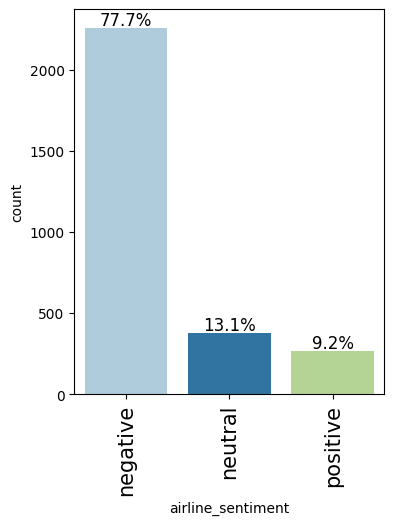

In [ ]:
labeled_barplot(data, "airline_sentiment", perc=True)

- **Majority of the tweets are negative (78%), followed by neutral tweets (13%), and then the positive tweets (9%).**

#### Plot of all the negative reasons

<ipython-input-11-bc394adc92ba>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


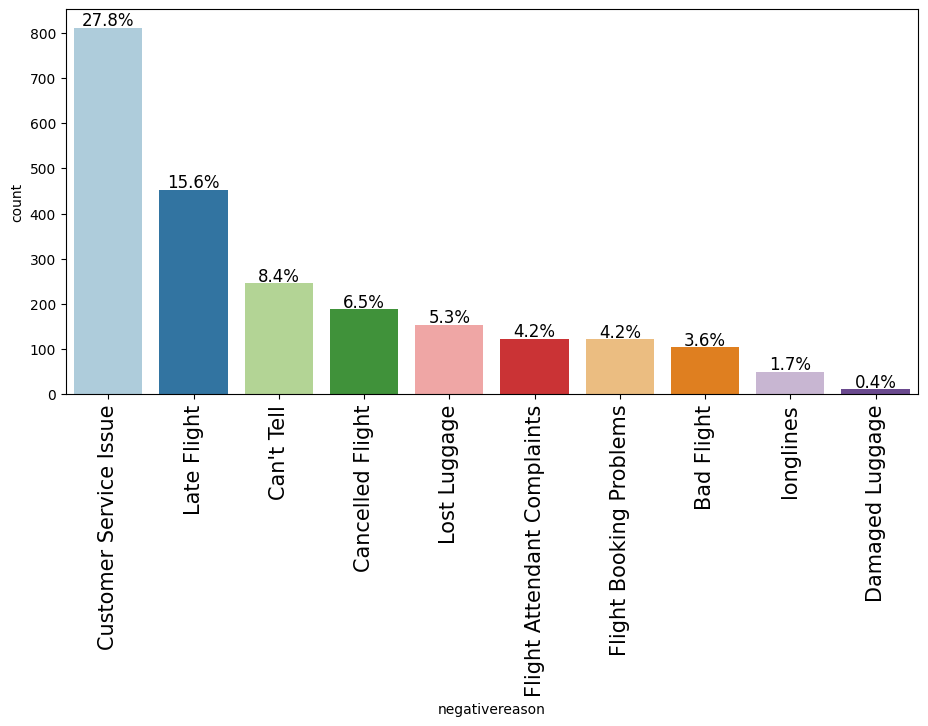

In [ ]:
labeled_barplot(data, "negativereason", perc=True)

**The predominant causes of negative tweets appear to be customer service issues(28%) and late flights(16%), as indicated by the graph**

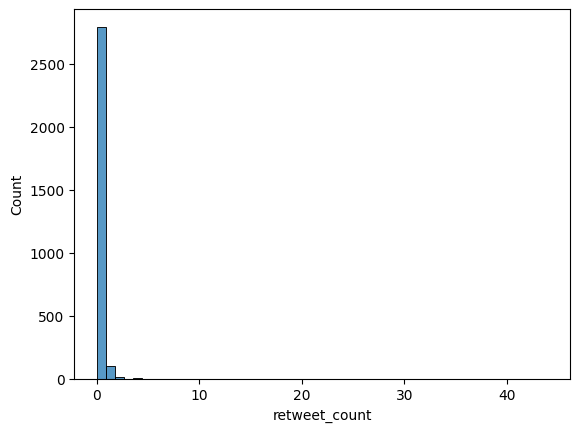

In [ ]:
sns.histplot(data, x='retweet_count', bins =50);

- A majority of the customer tweets are not re-tweeted
- The lower number of retweet counts suggests that customers are less inclined to retweet

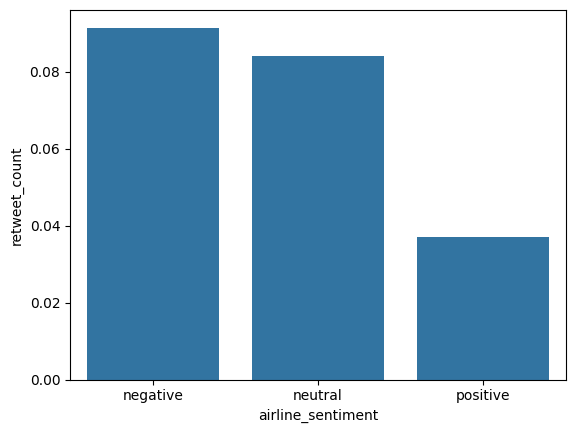

In [ ]:
sns.barplot(data, y='retweet_count', x='airline_sentiment', errorbar=('ci', False));

## EDA Results

`airline sentiment`

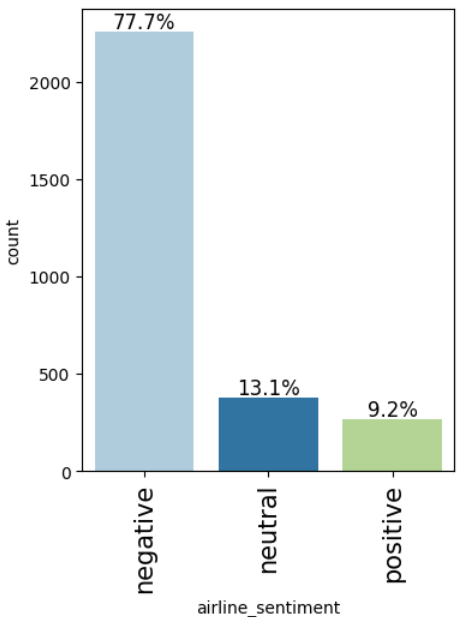

**Majority of the tweets are negative (78%), followed by neutral tweets (13%), and then the positive tweets (9%).**

`retweet count vs airline sentiment`

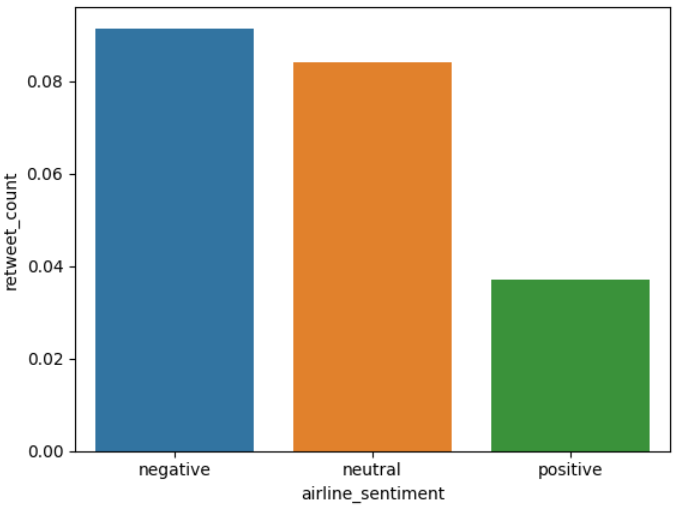

**On average, negative sentiment tweets get re-tweeted the most**

`Negative reasons`

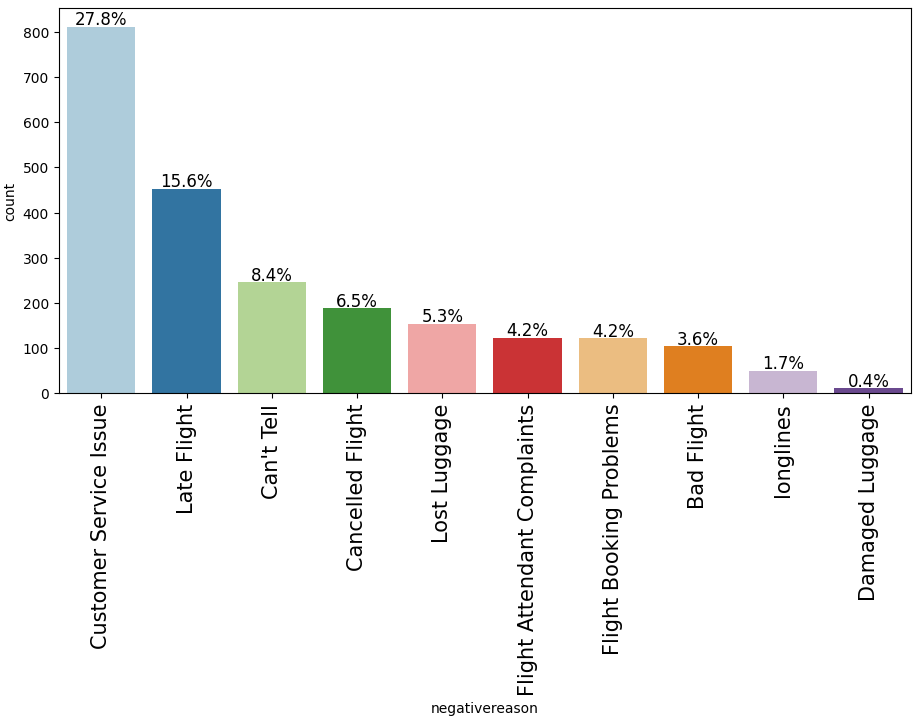

**The predominant causes of negative tweets appear to be customer service issues(28%) and late flights(16%), as indicated by the graph**

Effectively gauging public sentiment on Twitter involves navigating through a vast ocean of diverse opinions and emotions expressed in succinct messages. The inherent brevity and colloquial nature of tweets pose a unique challenge for manual analysis. Human cognitive limitations may lead to oversight or misinterpretation of subtle nuances, making it essential to leverage the power of artificial intelligence for a more accurate and efficient approach.

To address this, we need to develop an AI model that can take in raw text and understand the nuances in it to accurately predict the sentiment. This model will be adept at:

- Take customer reviews (as raw text) of different sentiment categories as input
- Develop an understanding of the nuances in the raw text
- Building a robust mathematical model to predict the sentiment using the understanding
- Predict the sentiment of future customer reviews using the learned model

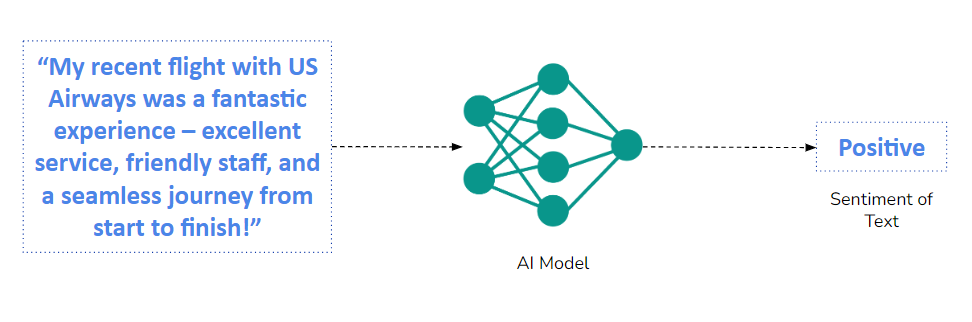

# **Model Building**


**The AI model is the 'heart' of our AI solution.** The model serves as the core component that brings intelligence and functionality to an end-to-end AI solution. It leverages learned patterns and insights to generate predictions or perform tasks, enabling organizations to make data-driven decisions, automate processes, and unlock valuable insights from their data.

The model building step of an AI solution can be further broken down into the sub-steps shown below.

## **Model Training and Evalution**

Training an AI model is important because it allows machines to learn and perform tasks without explicit programming. It enables the following:

- **Learning from Data**
- **Generalization and Adaptability**
- **Optimization and Performance Improvement**

We'll be using a pre-trained large language model (LLM) here. So, we don't need to train the model. We'll directly import the pre-trained model and then use it for predictions.

- We'll use the Google FLAN-T5 model (large variant) for illustration

## Data Preprocessing

In [ ]:
# Specify the features (X) and the target variable (y)
X = data.drop('airline_sentiment', axis=1)  # Replace 'target_variable' with the actual name of your target column
y = data['airline_sentiment']

# Further split the temporary data into validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
text_column_validation = X_validation['text'].copy()
actual_sentiment_validation = y_validation.copy()

In [ ]:
text_column_test = X_test['text'].copy()
actual_sentiment_test = y_test.copy()

## Model Training and Evaluation

In [ ]:
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-large")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-large", load_in_8bit=True, device_map="auto")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
# defining a function to generate, process, and return the LLM response
def llm_response(prompt):
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")
    outputs = model.generate(input_ids, max_length=300, do_sample=True, temperature=0.1)
    return tokenizer.decode(outputs[0])[6:-4]

In [ ]:
# checking a customer review and it's sentiment
print(text_column_validation[4])
print(actual_sentiment_validation[4])

@USAirways just hung up on me again.  Another waste of an hour of my time.  How am I supposed to book a one way award flight?  #badwebsite
negative


In [ ]:
# predicting the sentiment using the LLM
sys_prompt = """
    Categorize the sentiment of the customer review as positive, negative, or neutral.
"""

pred_sent = llm_response(
    """
        {}
        Review text: '{}'
    """.format(sys_prompt, text_column_validation[4])
)

print(pred_sent)

negative


- The model was able to correctly identify the sentiment here

In [ ]:
def predict_sentiment(review_text):
    pred = llm_response(
        """
            {}
            Review text: '{}'
        """.format(sys_prompt, review_text)
    )

    return pred

In [ ]:
predicted_sentiment = [predict_sentiment(item) for item in text_column_validation.values]
print(predicted_sentiment[4])

negative


In [ ]:
# combining the reviews, actual sentiments, and predicted sentiments together
df_combined = pd.concat([text_column_validation, actual_sentiment_validation], axis=1)
df_combined['predicted_sentiment'] = predicted_sentiment
df_combined.head()

,text,airline_sentiment,predicted_sentiment
439,@USAirways US 728/Feb 21. Ground power shorts ...,negative,negative
1621,@USAirways now the 3rd issue with the plane is...,negative,negative
423,@USAirways I need to speak with a customer ser...,negative,negative
2330,@USAirways delays to the max,negative,negative
1706,@USAirways Can you tell me why I waited 90 min...,negative,negative


In [ ]:
# creating confusion matrix
cnf_mt = confusion_matrix(df_combined['airline_sentiment'], df_combined['predicted_sentiment'], labels=['positive', 'neutral', 'negative'])
# computing accuracy
acc = accuracy_score(df_combined['airline_sentiment'], df_combined['predicted_sentiment'])

Accuracy: 0.8218237314002289


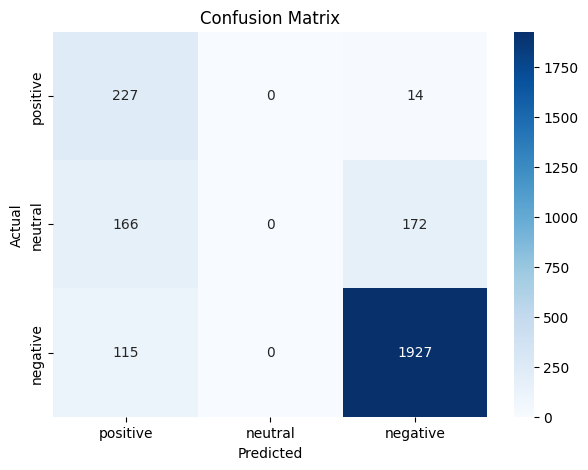

In [ ]:
# printing accuracy
print("Accuracy:", acc)

# creating a heatmap of the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(
    cnf_mt,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=['positive', 'neutral', 'negative'],
    yticklabels=['positive', 'neutral', 'negative'],
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Understanding Model Predictions and Business Consequences

In the realm of Twitter sentiment analysis for our business, the paramount objective is to accurately identify and understand customer sentiments. It is far more critical to ensure that tweets expressing genuine dissatisfaction or negative sentiments are correctly identified, even if it results in a few instances where positive sentiments are misclassified.

## Observations from Model Evaluation

- Our AI model has a score of 82% on the train data.

- However, the model fails to correctly classify the custimer reviews with a neutral sentiment

- This can have adverse consequences, so we need to improve the model's performance to better capture the nuances in neutral customer reviews

## **Model Tuning**

Model tuning is important for

- **Optimizing Performance**
- **Determining the right fit**
- **Adapting to Data Characteristics**

When trying to improve the performance, there are two approaches one can take.

**Approach 1 - Fine-tuning the Model**:

- **Process**: You would provide the model with data that is labeled or structured according to the task at hand, and then train the model on this task-specific data to fine-tune a part of the model. This process allows the model to adapt to the nuances and requirements of the particular use case.

- **Advantages**: Fine-tuning is effective when we have a well-defined task and a dataset specific to that task. It helps the model generalize better to our specific needs.

**Approach 2 - Using Prompts**:

- **Process**: The prompt provided to the model for doing the specified task is strategically designed and formulated to elicit specific, desired responses or information from the model. This doesn't involve retraining the model but relies on the model's existing capabilities.

- **Advantages**: This approach is quick and easy, especially when you don't have the resources or time for fine-tuning. It's effective for tasks where the model's general knowledge is sufficient, and you only need to guide its responses.

**We will tune the model with the second approach by doing prompt engineering.**

## Model Tuning

In [ ]:
sys_prompt = """
    Categorize the sentiment of the customer review as positive, negative, or neutral.
    Leverage your expertise in the aviation industry and deep understanding of industry trends to analyze the nuanced expressions and overall tone.
    It is crucial to accurately identify neutral sentiments, which may indicate a balanced view or neutral stance towards Us Airways. Neutral expressions could involve factual statements without explicit positive or negative opinions.
    Consider the importance of these neutral sentiments in gauging the public sentiment towards the airline company.
    For instance, a positive sentiment might convey satisfaction with the airline's services, a negative sentiment could express dissatisfaction, while neutral sentiment may reflect an impartial observation or a neutral standpoint
"""

- Note that we have specifically highlighted the need for capturing the nuances in neutral sentiments in the prompt here as that is where the model was struggling previously

In [ ]:
pred_sent = llm_response(
    """
        {}
        Review text: '{}'
    """.format(sys_prompt, text_column_validation[4])
)

print(pred_sent)

negative


In [ ]:
predicted_sentiment_tuned = [predict_sentiment(item) for item in text_column_validation.values]
print(predicted_sentiment_tuned[4])

negative


In [ ]:
# combining the reviews, actual sentiments, and predicted sentiments together
df_combined = pd.concat([text_column_validation, actual_sentiment_validation], axis=1)
df_combined['predicted_sentiment'] = predicted_sentiment_tuned
df_combined.head()

,text,airline_sentiment,predicted_sentiment
439,@USAirways US 728/Feb 21. Ground power shorts ...,negative,negative
1621,@USAirways now the 3rd issue with the plane is...,negative,negative
423,@USAirways I need to speak with a customer ser...,negative,negative
2330,@USAirways delays to the max,negative,negative
1706,@USAirways Can you tell me why I waited 90 min...,negative,negative


In [ ]:
# creating confusion matrix
cnf_mt_tuned = confusion_matrix(df_combined['airline_sentiment'], df_combined['predicted_sentiment'], labels=['positive', 'neutral', 'negative'])
# computing accuracy
acc_tuned = accuracy_score(df_combined['airline_sentiment'], df_combined['predicted_sentiment'])

Accuracy: 0.8370850820297596


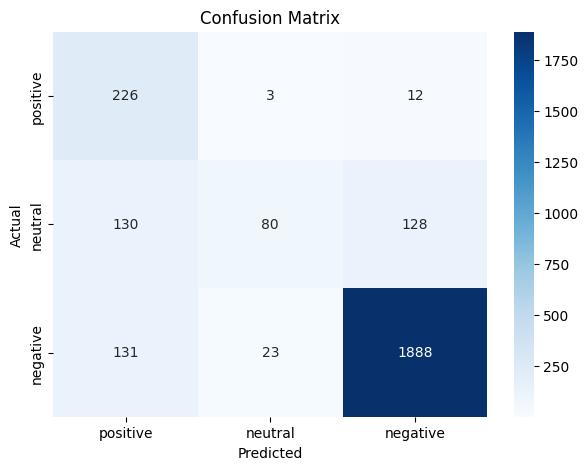

In [ ]:
# printing accuracy
print("Accuracy:", acc_tuned)

# creating a heatmap of the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(
    cnf_mt_tuned,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=['positive', 'neutral', 'negative'],
    yticklabels=['positive', 'neutral', 'negative'],
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Observations from Model Evaluation

- The AI model's performance score has increased a bit to ~84%

- The model is also able to identify neutral sentiments better now

- One can try to improvise the prompt further to improve the model performance

## **Model Testing**

After tuning the car, it's essential to test it thoroughly before using it in real-world situations. Model testing is like taking the car out for a test drive to ensure it performs as expected. In this stage, you simulate different scenarios and evaluate how well the model responds. For the car example, you would assess how the car handles various driving conditions, such as highways, urban roads, and off-road terrains. Testing helps identify any issues or weaknesses in the model that need to be addressed.

Model testing is important for:

- **Validating model performance**
- **Identifying and mitigating errors or flaws**
- **Assessing model robustness and generalizability**
- **Building user trust and confidence**

## Model Testing

In [ ]:
predicted_sentiment_test = [predict_sentiment(item) for item in text_column_test.values]

In [ ]:
# combining the reviews, actual sentiments, and predicted sentiments together
df_combined = pd.concat([text_column_test, actual_sentiment_test], axis=1)
df_combined['predicted_sentiment'] = predicted_sentiment_test
df_combined.head()

,text,airline_sentiment,predicted_sentiment
178,@USAirways it doesn't take 6 days to respond t...,negative,negative
678,@USAirways And how do you only have 1 agent at...,negative,negative
2873,@USAirways will do. Hoping for a voucher for a...,positive,positive
2686,@USAirways and if the flight is full?,neutral,neutral
1898,@sarahpompei don't bother wasting your time! ...,negative,negative


In [ ]:
# creating confusion matrix
cnf_mt_tuned = confusion_matrix(df_combined['airline_sentiment'], df_combined['predicted_sentiment'], labels=['positive', 'neutral', 'negative'])
# computing accuracy
acc_tuned = accuracy_score(df_combined['airline_sentiment'], df_combined['predicted_sentiment'])

Accuracy: 0.821917808219178


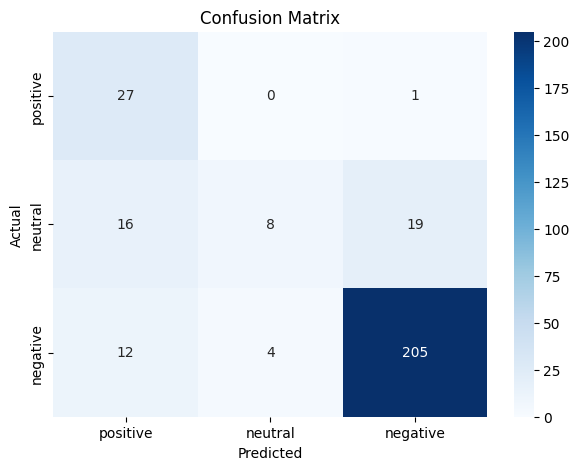

In [ ]:
# printing accuracy
print("Accuracy:", acc_tuned)

# creating a heatmap of the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(
    cnf_mt_tuned,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=['positive', 'neutral', 'negative'],
    yticklabels=['positive', 'neutral', 'negative'],
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- The model's performance on test data is similar to what we saw previously

# **Model Deployment and Monitoring**

Model deployment helps with the following:

- **Realizing Value**
- **Scalability and Efficiency**
- **Continuous Learning and Improvement**
- **Business Impact and Decision Support**

## Model Deployment

**Note**: We'll not be saving the model as it is a large model. We'll directly be using the model.

In [ ]:
# define a function that will take the necessary inputs and make predictions

def predict_review_sentiment(review):
    sys_prompt = """
        Categorize the sentiment of the customer review as positive, negative, or neutral.
        Leverage your expertise in the aviation industry and deep understanding of industry trends to analyze the nuanced expressions and overall tone.
        It is crucial to accurately identify neutral sentiments, which may indicate a balanced view or neutral stance towards Us Airways. Neutral expressions could involve factual statements without explicit positive or negative opinions.
        Consider the importance of these neutral sentiments in gauging the public sentiment towards the airline company.
        For instance, a positive sentiment might convey satisfaction with the airline's services, a negative sentiment could express dissatisfaction, while neutral sentiment may reflect an impartial observation or a neutral standpoint
    """

    # predicting the sentiment of the review
    pred_sent = llm_response(
        """
            {}
            Review text: '{}'
        """.format(sys_prompt, review)
    )

    # returning the final output
    return pred_sent

In [ ]:
# creating the deployment input interface
review_text = gr.Textbox(label="Enter the customer sentiment here.")

# creating the deployment output interface
sentiment = gr.Textbox(label="Sentiment Type")

In [ ]:
# defining the structure of the deployment interface and how the components will interact
demo = gr.Interface(
    fn=predict_review_sentiment,
    inputs = review_text,
    outputs = sentiment,
    title="Customer Review Sentiment Analyzer",
    description= "This interface will predict whether the sentiment of a customer is positive, negative, or neutral based on the review text.",
    allow_flagging="never"
)

In [ ]:
# deploying the model
demo.launch(inline=False, share=True, debug=True)

In [ ]:
# shutting down the deployed model
demo.close()

## Types of Model Deployment

There are generally two main modes of making predictions with a deployed AI model:

- **Batch Prediction**
- **Real-time (or Interactive) Prediction**

The choice of prediction mode depends on the specific requirements and use case of the deployed AI model. Batch prediction is preferable when efficiency in processing large volumes of data is important, while real-time prediction is suitable for scenarios that require immediate or interactive responses to new data.

# **Metrics and Dashboarding**

Metrics and dashboarding are the tools that businesses use to track their performance. Some of the benefits of using metrics and dashboarding:

- **Improved decision-making**
- **Increased efficiency**
- **Increased visibility**

### Dashboard for the Data Team

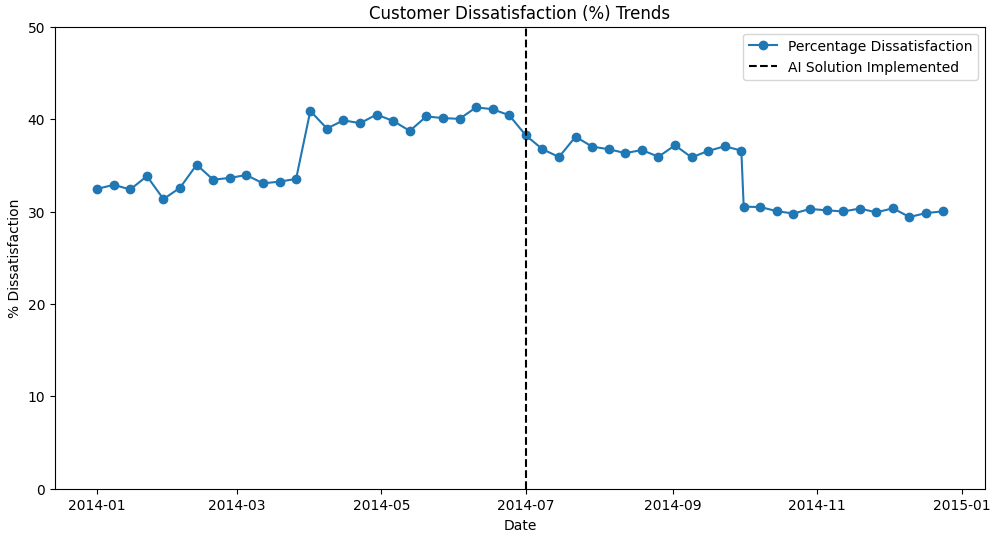

**Note**: The numbers above are indicative in nature.

# **Decision Making**

We have built an AI model, tested it, deployed it, and used the model's outputs to visualize the important business metrics via dashboards. Now the final step is to use the AI model for decision-making and determine the impact of implementing the AI solution.

The airline can use the sentiment prediction done by the model to tag customer reviews and analyze them to take necessary actions.

- Negative sentiments can be detected in real-time and the airline can address and resolve problems before they escalate, demonstrating responsiveness and improving overall customer satisfaction

- The sentiment trends can be analyzed to identify recurring patterns or issues. This would help to make strategic decisions, identify areas that consistently receive positive feedback, and proactively address recurrent concerns.

- Sentiment analysis can be used to drive operational changes. For example, if sentiments reveal consistent dissatisfaction with certain aspects of the boarding process, the airline can explore process optimizations, staff training, or facility improvements to enhance the overall experience

- In addition to analyzing their own feedback, airlines can also use the model to generate and compare sentiment analysis results with those of competitors to identify areas where the airline can differentiate itself

The operations team can check the customer dissatisfaction rate over time to gauge if the AI solution has been fruitful.

- In the three months prior to the AI solution implementation, the customer dissatisfaction rate was at ~40%
- Once the AI solution was implemented, the airline were able to take some quick actions to improve their operations. This helped in bringing down the customer dissatisfaction rate slightly to ~37%
- Gradually, the airline took strategic decisions to make significant changes in optimizing operations and conducted multiple staff trainings. This helped in bringing down the customer dissatisfaction rate further to ~30%

**Note**: The numbers above are indicative in nature.